In [79]:
import numpy as np
import matplotlib.pyplot as plt

def henon_map(x, y, a, b):
    x_n1 = 1 - a * x**2 + y
    y_n1 = b * x
    return x_n1, y_n1

# Generate time series data for the Hénon system
num_points = 10000
a = 1.4
b = 0.3

x_values = np.zeros(num_points)
y_values = np.zeros(num_points)

for i in range(1, num_points):
    x_values[i], y_values[i] = henon_map(x_values[i-1], y_values[i-1], a, b)




In [80]:

# Calculate discrete differences to approximate derivatives
dx = np.diff(x_values)
dy = np.diff(y_values)

In [81]:
def central_difference(X, h=1):
    dx = np.zeros([len(X)-2] )
    for i in range(1, len(X)-1):
        dx[i-1] = (X[i+1] - X[i-1]) / (2*h)
    return dx


In [82]:
ndx = central_difference(x_values)
ndy = central_difference(y_values)

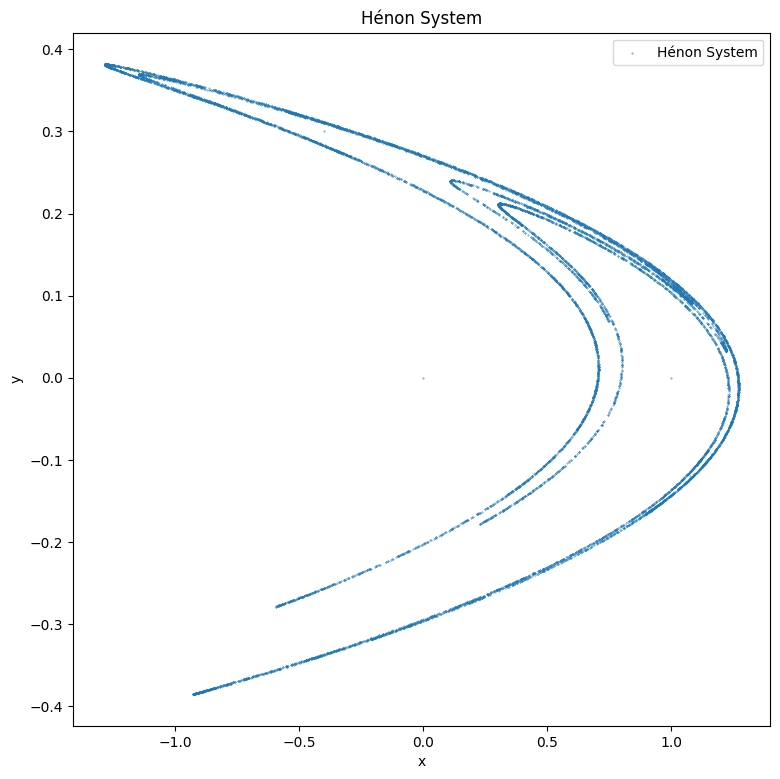

In [83]:
# Scatter plots for the Hénon system and its derivatives with a wider aspect ratio
plt.figure(figsize=(9, 9))

plt.scatter(x_values, y_values, label='Hénon System', s=.1)
plt.title('Hénon System')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Text(0.5, 1.0, 'x time series')

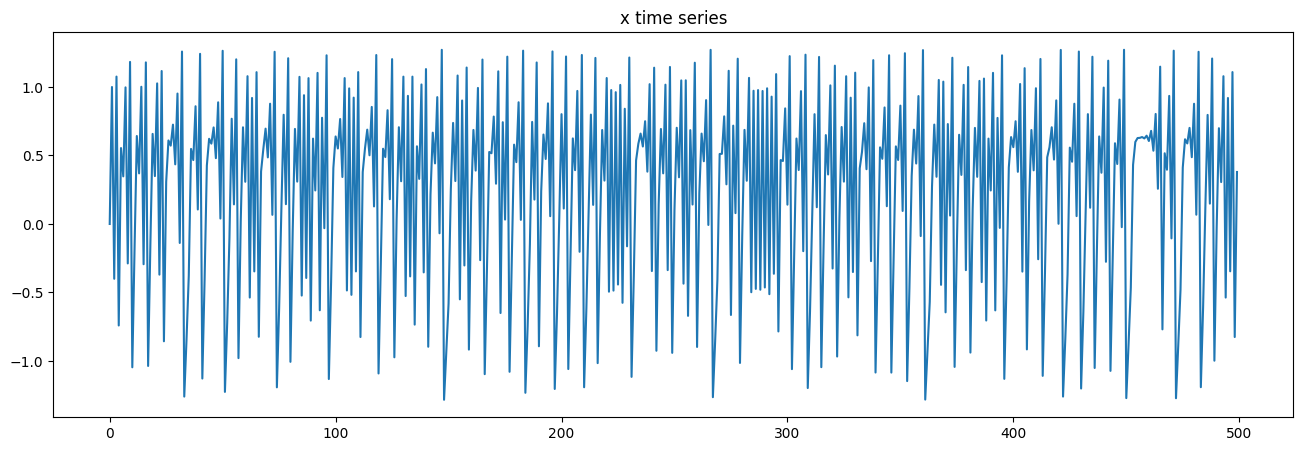

In [84]:
plt.figure(figsize=(16, 5))
plt.plot(range(500), x_values[:500], label='x time series')
plt.title('x time series')

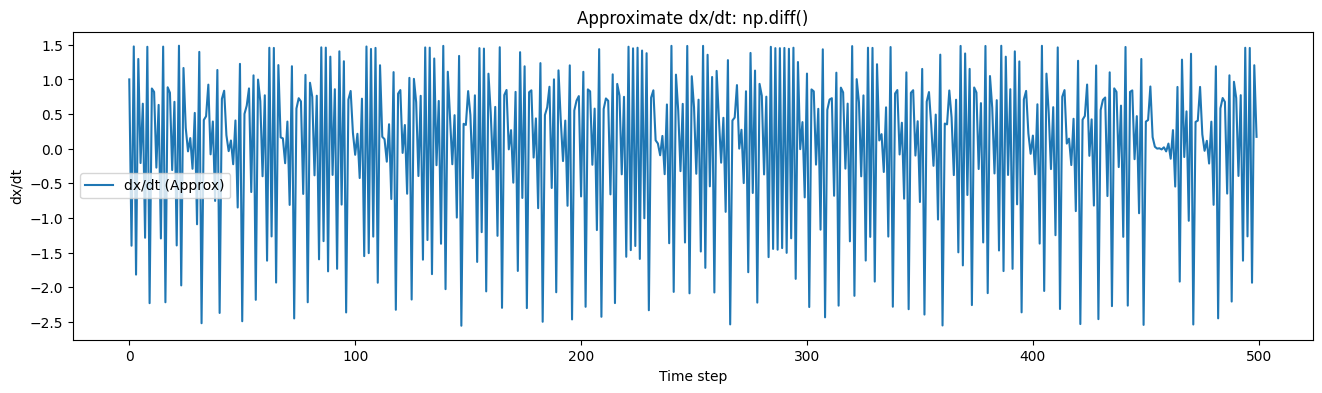

In [85]:
plt.figure(figsize=(16, 4))

plt.plot(range(len(dx[:500])), dx[:500], label='dx/dt (Approx)')
plt.title('Approximate dx/dt: np.diff()')
plt.xlabel('Time step')
plt.ylabel('dx/dt')
plt.legend()

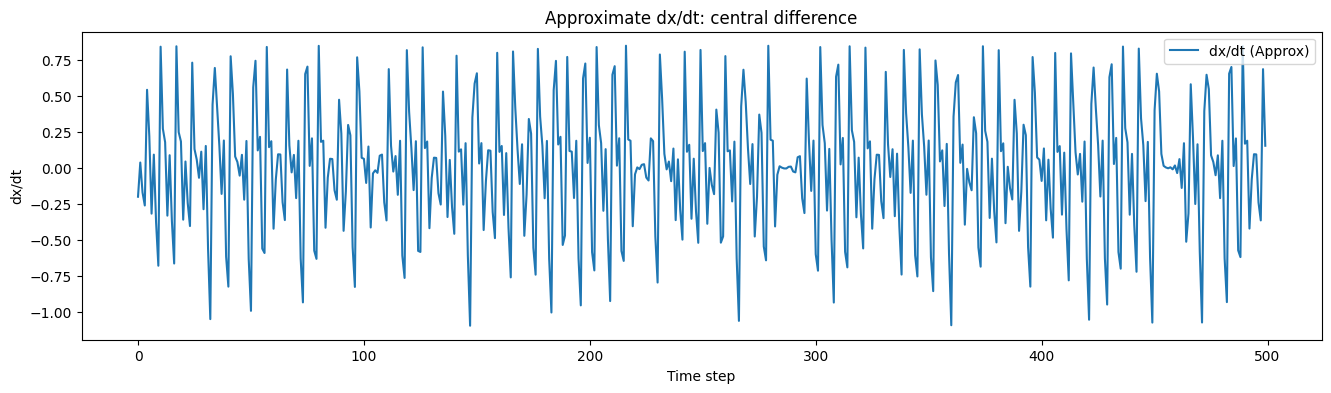

In [86]:
plt.figure(figsize=(16, 4))

plt.plot(range(len(ndx[:500])), ndx[:500], label='dx/dt (Approx)')
plt.title('Approximate dx/dt: central difference')
plt.xlabel('Time step')
plt.ylabel('dx/dt')
plt.legend()

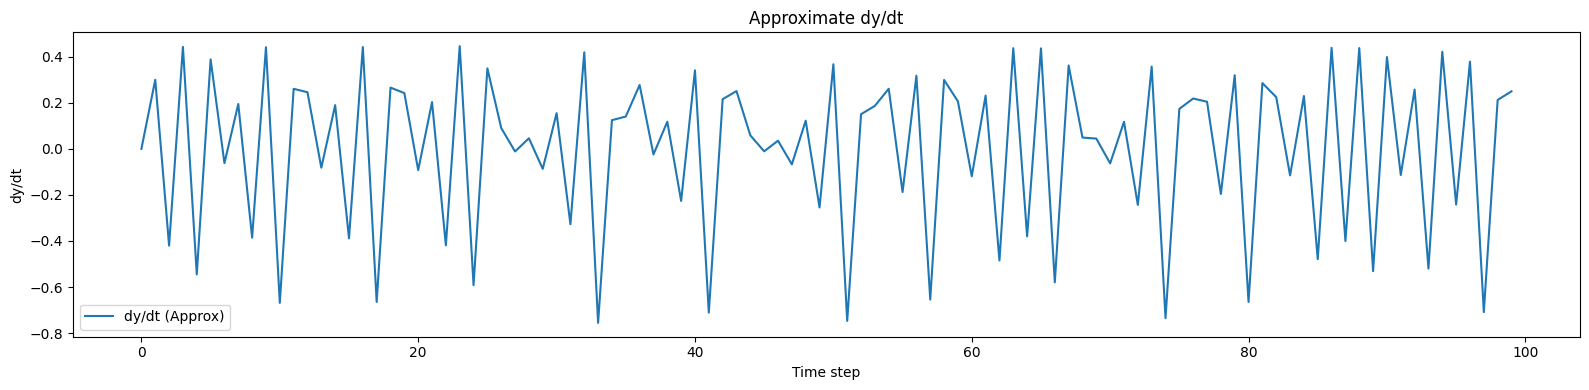

In [87]:
plt.figure(figsize=(16, 4))

plt.plot(range(len(dy[:100])), dy[:100], label='dy/dt (Approx)')
plt.title('Approximate dy/dt')
plt.xlabel('Time step')
plt.ylabel('dy/dt')
plt.legend()

plt.tight_layout()
plt.show()


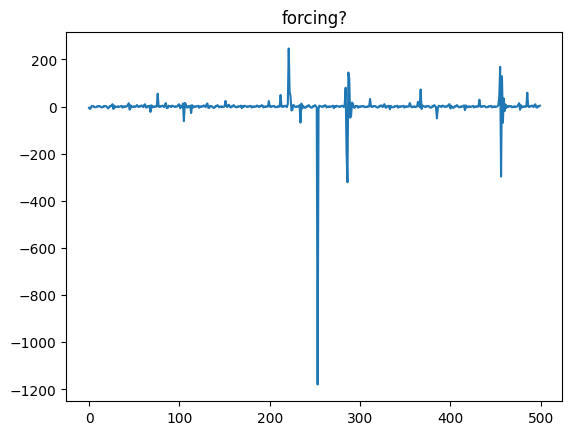

In [88]:
idk = x_values[1:-1] / ndx
plt.title('forcing?')

#plt.plot(np.abs(idk[:]))
plt.plot(idk[:500])

In [89]:
stackmax = 10

H = np.zeros([stackmax, len(x_values)-stackmax])
for i in range(stackmax):
    H[i, :] = x_values[i:-(stackmax-i)]

H.shape
H[:5, :5]

array([[ 0.        ,  1.        , -0.4       ,  1.076     , -0.7408864 ],
       [ 1.        , -0.4       ,  1.076     , -0.7408864 ,  0.55432228],
       [-0.4       ,  1.076     , -0.7408864 ,  0.55432228,  0.34755162],
       [ 1.076     , -0.7408864 ,  0.55432228,  0.34755162,  0.99718771],
       [-0.7408864 ,  0.55432228,  0.34755162,  0.99718771, -0.28787117]])

In [90]:
V, S, U = np.linalg.svd(H)
V.shape, S.shape, U.shape

((10, 10), (10,), (9990, 9990))